# Ride Data Analysis – Practical Exam 

## Task 1. Data Understaning & Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats


### Load Dataset

In [2]:
df = pd.read_csv("raw rides dataset.csv")
df.head()

,ride_id,customer_id,gender,ride_datetime,signup_date,trip_duration_min,distance_km,fare_amount,ride_payment_mode,zone_name,traffic_level,ride_status
0,1,1046,Female,01-01-2023 04:41,04-04-2021,16.386163,8.868857,61.748233,Cash,Zone_A,Low,Completed
1,2,1011,Female,02-01-2023 06:06,23-08-2021,16.195380,6.613467,89.486911,Cash,Zone_B,Low,Completed
2,3,1061,Male,01-01-2023 13:10,08-03-2022,34.621994,0.300753,158.350354,Cash,Zone_A,High,Completed
3,4,1079,Female,01-01-2023 09:07,24-12-2020,24.471400,7.685529,251.407161,Card,Zone_D,Low,Cancelled
4,5,1082,Female,01-01-2023 01:41,16-04-2021,NaN,21.018589,33.802052,UPI,Zone_D,Medium,Completed


### Display

In [3]:
df.shape

(500, 12)

In [4]:
df.columns

Index(['ride_id', 'customer_id', 'gender', 'ride_datetime', 'signup_date',
       'trip_duration_min', 'distance_km', 'fare_amount', 'ride_payment_mode',
       'zone_name', 'traffic_level', 'ride_status'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ride_id            500 non-null    int64  
 1   customer_id        500 non-null    int64  
 2   gender             478 non-null    object 
 3   ride_datetime      500 non-null    object 
 4   signup_date        500 non-null    object 
 5   trip_duration_min  490 non-null    float64
 6   distance_km        500 non-null    float64
 7   fare_amount        500 non-null    float64
 8   ride_payment_mode  483 non-null    object 
 9   zone_name          500 non-null    object 
 10  traffic_level      500 non-null    object 
 11  ride_status        500 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 47.0+ KB


## Missing Value Count

In [6]:
(df.isnull().sum() / len(df)) * 100

ride_id              0.0
customer_id          0.0
gender               4.4
ride_datetime        0.0
signup_date          0.0
trip_duration_min    2.0
distance_km          0.0
fare_amount          0.0
ride_payment_mode    3.4
zone_name            0.0
traffic_level        0.0
ride_status          0.0
dtype: float64

## Statistical Summary

In [7]:
df.describe()

,ride_id,customer_id,trip_duration_min,distance_km,fare_amount
count,500.000000,500.000000,490.000000,500.000000,500.000000
mean,250.500000,1097.490000,25.358445,8.353411,179.659195
std,144.481833,59.553061,10.117273,4.025756,93.718462
min,1.000000,1000.000000,0.018029,0.000000,-286.077174
25%,125.750000,1045.000000,18.330352,5.572728,126.659283
50%,250.500000,1097.000000,25.016253,8.572298,184.882709
75%,375.250000,1152.000000,32.748591,10.833513,238.637746
max,500.000000,1199.000000,55.871552,21.018589,440.839286


In [8]:
df.duplicated().sum()

np.int64(0)

####  Invalid Entry Checks

In [9]:

print("Negative fares:", (df['fare_amount'] < 0).sum())
print("Zero distance rides:", (df['distance_km'] == 0).sum())


Negative fares: 10
Zero distance rides: 10


In [10]:
df[df['fare_amount'] < 0]

,ride_id,customer_id,gender,ride_datetime,signup_date,trip_duration_min,distance_km,fare_amount,ride_payment_mode,zone_name,traffic_level,ride_status
12,13,1088,Female,01-01-2023 17:51,12-09-2020,27.299544,0.000000,-33.802052,Card,Zone_D,Low,Completed
38,39,1081,Male,01-01-2023 11:31,06-11-2021,28.224907,9.866902,-251.407161,Cash,Zone_A,Medium,Completed
68,69,1107,Male,01-01-2023 00:46,07-10-2020,27.309334,6.374151,-61.748233,Cash,Zone_D,Low,Completed
83,84,1028,Female,01-01-2023 00:39,19-02-2022,16.249746,1.047278,-89.486911,Card,Zone_A,Low,Completed
102,103,1157,Male,01-01-2023 03:46,02-07-2022,30.532727,11.434053,-158.350354,Cash,Zone_C,Low,Completed
180,181,1183,Other,01-01-2023 04:10,22-12-2020,30.513197,10.364086,-286.077174,UPI,Zone_B,High,Completed
267,268,1154,Male,01-01-2023 12:07,31-10-2020,45.148786,12.218665,-187.403249,Cash,Zone_A,Medium,Completed
296,297,1137,Male,01-01-2023 14:41,13-09-2020,20.943750,6.541803,-175.615309,Cash,Zone_D,Medium,Completed
312,313,1032,Female,01-01-2023 00:15,16-08-2022,33.299622,5.374762,-142.065667,UPI,Zone_B,Medium,Completed
492,493,1040,Male,01-01-2023 03:14,10-04-2022,19.053942,7.703492,-45.847322,Card,Zone_C,Medium,Completed


#### Separate Numeric & Categorical Columns

In [11]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

####  Handle Numeric Missing Values (SimpleImputer)

In [12]:
mean_imputer = SimpleImputer(strategy='mean')
df[num_cols] = mean_imputer.fit_transform(df[num_cols])

####  Handle Categorical Missing Values (Most Frequent)

In [13]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = mode_imputer.fit_transform(df[cat_cols])

#### Apply KNN Imputer on Key Numeric Columns

In [14]:
knn_cols = [col for col in ['trip_duration', 'distance', 'fare_amount'] if col in df.columns]

knn_imputer = KNNImputer(n_neighbors=5)
df[knn_cols] = knn_imputer.fit_transform(df[knn_cols])

#### Convert Date Column to Proper Datetime Format

In [15]:
if 'ride_datetime' in df.columns:
    df['ride_datetime'] = pd.to_datetime(df['ride_datetime'], errors='coerce')

####  Remove Unrealistic Entries

In [16]:
if 'fare_amount' in df.columns:
    df = df[df['fare_amount'] >= 0]

In [17]:
if 'distance' in df.columns and 'fare_amount' in df.columns:
    df = df[~((df['distance'] == 0) & (df['fare_amount'] > 0))]

#####  Dataset Shape After Cleaning

In [18]:
df.shape

(490, 12)

In [19]:
df.isnull().sum()

ride_id              0
customer_id          0
gender               0
ride_datetime        0
signup_date          0
trip_duration_min    0
distance_km          0
fare_amount          0
ride_payment_mode    0
zone_name            0
traffic_level        0
ride_status          0
dtype: int64

## Task 3. Outllier Handling

####  Z-Score Outlier Detection

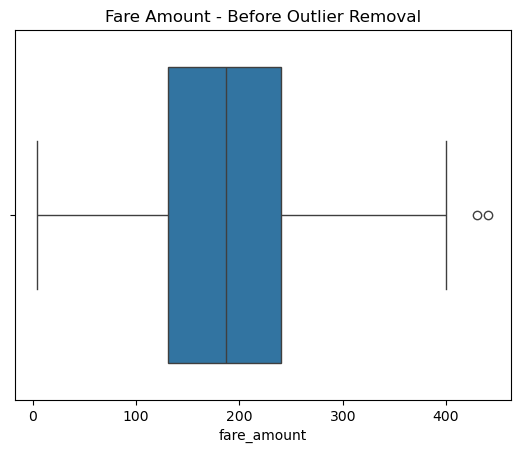

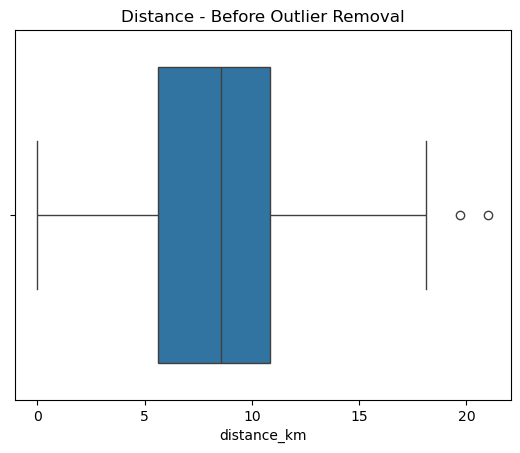

In [20]:
plt.figure()
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount - Before Outlier Removal")
plt.show()

plt.figure()
sns.boxplot(x=df['distance_km'])
plt.title("Distance - Before Outlier Removal")
plt.show()

In [21]:
z_fare = np.abs(stats.zscore(df['fare_amount']))
z_distance = np.abs(stats.zscore(df['distance_km']))

df_z_cleaned = df[(z_fare < 3) & (z_distance < 3)]

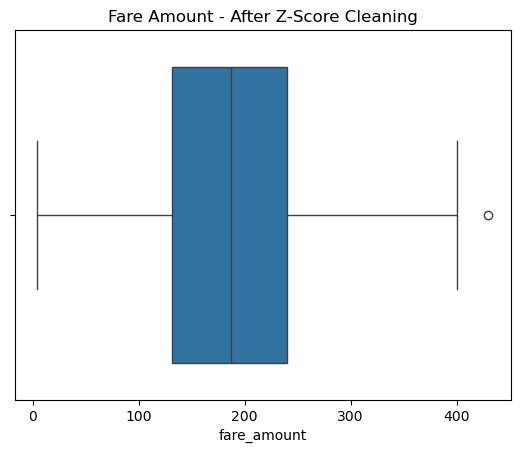

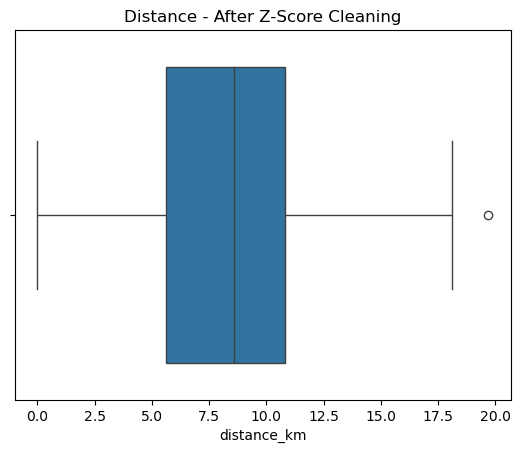

In [22]:
plt.figure()
sns.boxplot(x=df_z_cleaned['fare_amount'])
plt.title("Fare Amount - After Z-Score Cleaning")
plt.show()

plt.figure()
sns.boxplot(x=df_z_cleaned['distance_km'])
plt.title("Distance - After Z-Score Cleaning")
plt.show()

* Z-score method removed extreme fare and distance values beyond 3 standard deviations.

* Data distribution became more compact and less skewed after cleaning.

#### IQR Method for Trip Duration

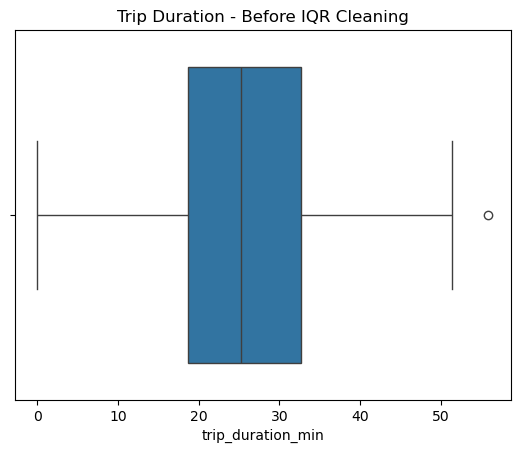

In [23]:
plt.figure()
sns.boxplot(x=df['trip_duration_min'])
plt.title("Trip Duration - Before IQR Cleaning")
plt.show()

In [24]:
Q1 = df['trip_duration_min'].quantile(0.25)
Q3 = df['trip_duration_min'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_cleaned = df[(df['trip_duration_min'] >= lower_bound) & 
                    (df['trip_duration_min'] <= upper_bound)]

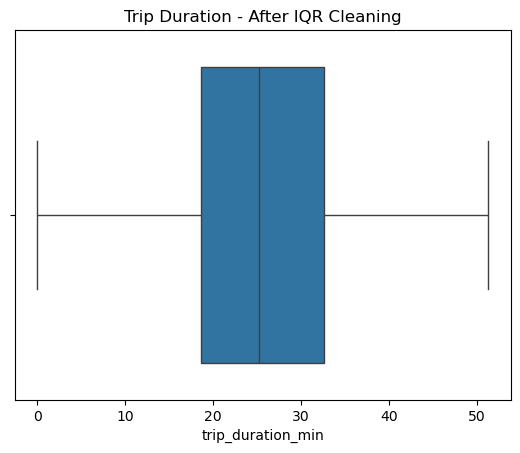

In [25]:
plt.figure()
sns.boxplot(x=df_iqr_cleaned['trip_duration_min'])
plt.title("Trip Duration - After IQR Cleaning")
plt.show()

* IQR method removed unusually short and extremely long ride durations.

* The spread of trip duration became more balanced and realistic.

In [26]:
df['fare_amount_winsorized'] = winsorize(df['fare_amount'], limits=[0.05, 0.05])

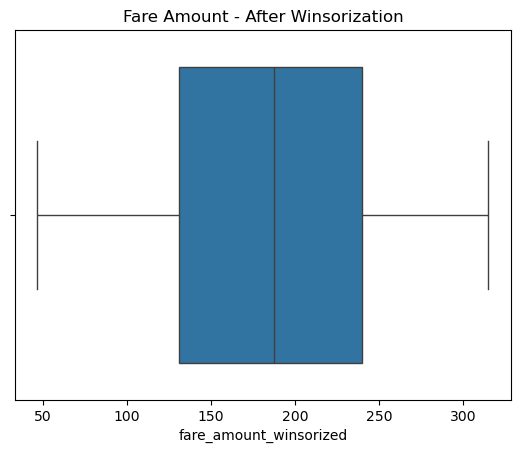

In [27]:
plt.figure()
sns.boxplot(x=df['fare_amount_winsorized'])
plt.title("Fare Amount - After Winsorization")
plt.show()

* Winsorization capped extreme 5% fare values instead of deleting them.

* This preserves data size while reducing impact of extreme surge pricing.

In [28]:
print("Original Rows:", len(df))
print("After Z-Score Cleaning:", len(df_z_cleaned))
print("After IQR Cleaning:", len(df_iqr_cleaned))

Original Rows: 490
After Z-Score Cleaning: 488
After IQR Cleaning: 489


## Outlier-Free Dataset Shape

In [29]:
df.shape

(490, 13)

## Task 4. Data Transformation

#### Convert Datetime 

In [30]:
df['ride_datetime'] = pd.to_datetime(df['ride_datetime'], errors='coerce')

df['hour'] = df['ride_datetime'].dt.hour
df['day of week'] = df['ride_datetime'].dt.day_name()
df['month'] = df['ride_datetime'].dt.month

df[['ride_datetime', 'hour', 'day of week', 'month']].head()

,ride_datetime,hour,day of week,month
0,2023-01-01 04:41:00,4,Sunday,1
1,2023-02-01 06:06:00,6,Wednesday,2
2,2023-01-01 13:10:00,13,Sunday,1
3,2023-01-01 09:07:00,9,Sunday,1
4,2023-01-01 01:41:00,1,Sunday,1


#### Encode categorical columns

#####  Label Encoding – Gender

In [31]:
if 'gender' in df.columns:
    le = LabelEncoder()
    df['gender_encoded'] = le.fit_transform(df['gender'])

##### One-Hot Encoding

In [32]:
cols_to_encode = [col for col in ['ride_payment_mode', 'zone_name'] if col in df.columns]

df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

df.head()

,ride_id,customer_id,gender,ride_datetime,signup_date,trip_duration_min,distance_km,fare_amount,traffic_level,ride_status,fare_amount_winsorized,hour,day of week,month,gender_encoded,ride_payment_mode_Cash,ride_payment_mode_UPI,zone_name_Zone_B,zone_name_Zone_C,zone_name_Zone_D
0,1.0,1046.0,Female,2023-01-01 04:41:00,04-04-2021,16.386163,8.868857,61.748233,Low,Completed,61.748233,4,Sunday,1,0,True,False,False,False,False
1,2.0,1011.0,Female,2023-02-01 06:06:00,23-08-2021,16.195380,6.613467,89.486911,Low,Completed,89.486911,6,Wednesday,2,0,True,False,True,False,False
2,3.0,1061.0,Male,2023-01-01 13:10:00,08-03-2022,34.621994,0.300753,158.350354,High,Completed,158.350354,13,Sunday,1,1,True,False,False,False,False
3,4.0,1079.0,Female,2023-01-01 09:07:00,24-12-2020,24.471400,7.685529,251.407161,Low,Cancelled,251.407161,9,Sunday,1,0,False,False,False,False,True
4,5.0,1082.0,Female,2023-01-01 01:41:00,16-04-2021,25.358445,21.018589,33.802052,Medium,Completed,46.524900,1,Sunday,1,0,False,True,False,False,True


#####  Ordinal Encoding – Traffic Level

In [33]:
traffic_order = {'Low': 1, 'Medium': 2, 'High': 3}

if 'traffic_level' in df.columns:
    df['traffic_level_encoded'] = df['traffic_level'].map(traffic_order)
df.head()
df[['traffic_level','traffic_level_encoded']].head()

,traffic_level,traffic_level_encoded
0,Low,1
1,Low,1
2,High,3
3,Low,1
4,Medium,2


### Binning (Customer Ride Frequency)

In [34]:
if 'customer_id' in df.columns:
    ride_counts = df['customer_id'].value_counts()
    df['ride_frequency'] = df['customer_id'].map(ride_counts)

    df['frequency_category'] = pd.cut(
        df['ride_frequency'],
        bins=[0, 5, 15, np.inf],
        labels=['Low', 'Medium', 'High']
    )

df[['ride_frequency', 'frequency_category']].head()

,ride_frequency,frequency_category
0,4,Low
1,7,Medium
2,7,Medium
3,3,Low
4,1,Low


### Transform Skewed Numeric Columns

####  Log Transformation

In [35]:
if 'fare_amount' in df.columns:
    df['fare_log'] = np.log1p(df['fare_amount'])

if 'distance' in df.columns:
    df['distance_log'] = np.log1p(df['distance'])

####  Square Root Transformation

In [36]:
if 'trip_duration' in df.columns:
    df['duration_sqrt'] = np.sqrt(df['trip_duration'])

In [37]:
df.head()

,ride_id,customer_id,gender,ride_datetime,signup_date,trip_duration_min,distance_km,fare_amount,traffic_level,ride_status,...,gender_encoded,ride_payment_mode_Cash,ride_payment_mode_UPI,zone_name_Zone_B,zone_name_Zone_C,zone_name_Zone_D,traffic_level_encoded,ride_frequency,frequency_category,fare_log
0,1.0,1046.0,Female,2023-01-01 04:41:00,04-04-2021,16.386163,8.868857,61.748233,Low,Completed,...,0,True,False,False,False,False,1,4,Low,4.139130
1,2.0,1011.0,Female,2023-02-01 06:06:00,23-08-2021,16.195380,6.613467,89.486911,Low,Completed,...,0,True,False,True,False,False,1,7,Medium,4.505205
2,3.0,1061.0,Male,2023-01-01 13:10:00,08-03-2022,34.621994,0.300753,158.350354,High,Completed,...,1,True,False,False,False,False,3,7,Medium,5.071105
3,4.0,1079.0,Female,2023-01-01 09:07:00,24-12-2020,24.471400,7.685529,251.407161,Low,Cancelled,...,0,False,False,False,False,True,1,3,Low,5.531044
4,5.0,1082.0,Female,2023-01-01 01:41:00,16-04-2021,25.358445,21.018589,33.802052,Medium,Completed,...,0,False,True,False,False,True,2,1,Low,3.549676


In [38]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ride_id                 490 non-null    float64       
 1   customer_id             490 non-null    float64       
 2   gender                  490 non-null    object        
 3   ride_datetime           490 non-null    datetime64[ns]
 4   signup_date             490 non-null    object        
 5   trip_duration_min       490 non-null    float64       
 6   distance_km             490 non-null    float64       
 7   fare_amount             490 non-null    float64       
 8   traffic_level           490 non-null    object        
 9   ride_status             490 non-null    object        
 10  fare_amount_winsorized  490 non-null    float64       
 11  hour                    490 non-null    int32         
 12  day of week             490 non-null    object        


## 5. Feature Scalling

####  Standard Scaling

In [39]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
num_cols = df.select_dtypes(include=np.number).columns
before_stats = df[num_cols].agg(['mean', 'std', 'min', 'max'])
before_stats,num_cols

(         ride_id  customer_id  trip_duration_min  distance_km  fare_amount  \
 mean  251.816327  1097.424490          25.307443     8.379144   186.247757   
 std   144.158268    59.672791          10.049603     4.023552    81.561256   
 min     1.000000  1000.000000           0.018029     0.000000     4.460141   
 max   500.000000  1199.000000          55.871552    21.018589   440.839286   
 
       fare_amount_winsorized       hour     month  gender_encoded  \
 mean              185.677106   7.242857  1.097959        0.573469   
 std                75.996279   6.318749  0.304358        0.557263   
 min                46.524900   0.000000  1.000000        0.000000   
 max               315.214211  23.000000  3.000000        2.000000   
 
       traffic_level_encoded  ride_frequency  fare_log  
 mean               1.785714        3.522449  5.090123  
 std                0.746498        1.556209  0.628618  
 min                1.000000        1.000000  1.697475  
 max                3.0

In [41]:
scaler_standard = StandardScaler()

df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = scaler_standard.fit_transform(df[num_cols])

In [42]:
after_standard_stats = df_standard_scaled[num_cols].agg(['mean', 'std', 'min', 'max'])
after_standard_stats

,ride_id,customer_id,trip_duration_min,distance_km,fare_amount,fare_amount_winsorized,hour,month,gender_encoded,traffic_level_encoded,ride_frequency,fare_log
mean,-5.800349e-17,9.697458e-17,-2.356392e-16,2.863922e-16,-4.712783e-17,6.797284e-17,-1.812609e-17,-2.138879e-16,-7.250436e-18,-1.595096e-16,-9.063045e-18,-1.160070e-16
std,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00
min,-1.741646e+00,-1.634314e+00,-2.519031e+00,-2.084652e+00,-2.231126e+00,-1.832911e+00,-1.147420e+00,-3.221839e-01,-1.030134e+00,-1.053609e+00,-1.622550e+00,-5.402513e+00
max,1.723365e+00,1.703948e+00,3.044433e+00,3.144575e+00,3.124666e+00,1.706261e+00,2.496261e+00,6.255738e+00,2.562503e+00,1.628305e+00,2.236914e+00,1.593728e+00


* StandardScaler transformed numeric features to have mean ~ 0 and std ~ 1.

####  Min-Max Scaling

In [43]:
scaler_minmax = MinMaxScaler()

df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = scaler_minmax.fit_transform(df[num_cols])

In [44]:
after_minmax_stats = df_minmax_scaled[num_cols].agg(['mean', 'std', 'min', 'max'])
after_minmax_stats

,ride_id,customer_id,trip_duration_min,distance_km,fare_amount,fare_amount_winsorized,hour,month,gender_encoded,traffic_level_encoded,ride_frequency,fare_log
mean,0.502638,0.489570,0.452781,0.398654,0.416582,0.517893,0.314907,0.048980,0.286735,0.392857,0.420408,0.772202
std,0.288894,0.299863,0.179928,0.191428,0.186905,0.282841,0.274728,0.152179,0.278632,0.373249,0.259368,0.143080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* MinMaxScaler scaled all numeric values between 0 and 1

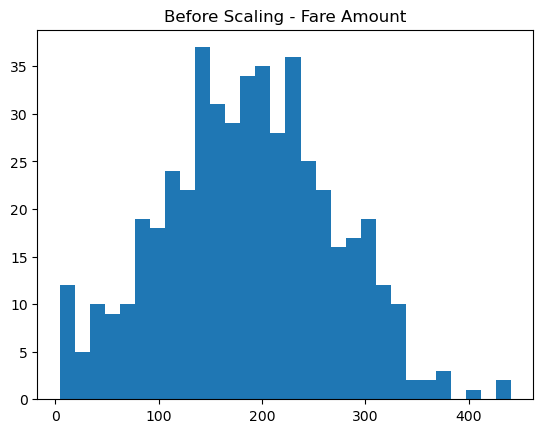

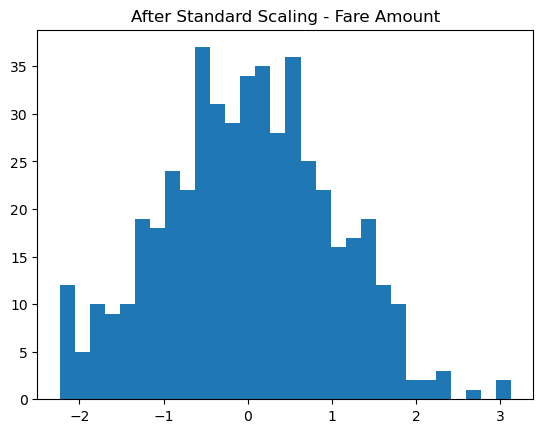

In [45]:
plt.figure()
plt.hist(df['fare_amount'], bins=30)
plt.title("Before Scaling - Fare Amount")
plt.show()

plt.figure()
plt.hist(df_standard_scaled['fare_amount'], bins=30)
plt.title("After Standard Scaling - Fare Amount")
plt.show()

* Feature scaling ensures all numeric variables are on the same scale.
* Without scaling, features with large values dominate machine learning models.

## Task 6. Feature Construction

#### avg ride distance

In [46]:
df['avg_ride_distance'] = df.groupby('customer_id')['distance_km'].transform('mean')

#### avg ride fare

In [47]:
df['avg_ride_fare'] = df.groupby('customer_id')['fare_amount'].transform('mean')

#### is peak hour

In [48]:
if 'hour' in df.columns:
    df['is_peak_hour'] = df['hour'].apply(
        lambda x: 1 if (7 <= x <= 9) or (18 <= x <= 21) else 0
    )

#### ride cancellation rate

In [49]:
cancel_rate = df.groupby('customer_id')['ride_status'].apply(lambda x: (x == 'Cancelled').mean())
df['ride_cancellation_rate'] = df['customer_id'].map(cancel_rate)


#### surge flag

In [50]:
df['surge_flag'] = (df['fare_amount'] / df['distance_km'] > 30).astype(int)

In [51]:
df[['avg_ride_distance', 'avg_ride_fare',
    'is_peak_hour','ride_cancellation_rate', 'surge_flag']].head()

,avg_ride_distance,avg_ride_fare,is_peak_hour,ride_cancellation_rate,surge_flag
0,8.977081,159.976616,0,0.000000,0
1,8.325186,180.726000,0,0.000000,0
2,5.816073,163.530128,0,0.000000,1
3,7.365164,184.338447,1,0.333333,1
4,21.018589,33.802052,0,0.000000,0


In [52]:
df.columns

Index(['ride_id', 'customer_id', 'gender', 'ride_datetime', 'signup_date',
       'trip_duration_min', 'distance_km', 'fare_amount', 'traffic_level',
       'ride_status', 'fare_amount_winsorized', 'hour', 'day of week', 'month',
       'gender_encoded', 'ride_payment_mode_Cash', 'ride_payment_mode_UPI',
       'zone_name_Zone_B', 'zone_name_Zone_C', 'zone_name_Zone_D',
       'traffic_level_encoded', 'ride_frequency', 'frequency_category',
       'fare_log', 'avg_ride_distance', 'avg_ride_fare', 'is_peak_hour',
       'ride_cancellation_rate', 'surge_flag'],
      dtype='object')

##  Final Dataset

In [53]:
df.head()

,ride_id,customer_id,gender,ride_datetime,signup_date,trip_duration_min,distance_km,fare_amount,traffic_level,ride_status,...,zone_name_Zone_D,traffic_level_encoded,ride_frequency,frequency_category,fare_log,avg_ride_distance,avg_ride_fare,is_peak_hour,ride_cancellation_rate,surge_flag
0,1.0,1046.0,Female,2023-01-01 04:41:00,04-04-2021,16.386163,8.868857,61.748233,Low,Completed,...,False,1,4,Low,4.139130,8.977081,159.976616,0,0.000000,0
1,2.0,1011.0,Female,2023-02-01 06:06:00,23-08-2021,16.195380,6.613467,89.486911,Low,Completed,...,False,1,7,Medium,4.505205,8.325186,180.726000,0,0.000000,0
2,3.0,1061.0,Male,2023-01-01 13:10:00,08-03-2022,34.621994,0.300753,158.350354,High,Completed,...,False,3,7,Medium,5.071105,5.816073,163.530128,0,0.000000,1
3,4.0,1079.0,Female,2023-01-01 09:07:00,24-12-2020,24.471400,7.685529,251.407161,Low,Cancelled,...,True,1,3,Low,5.531044,7.365164,184.338447,1,0.333333,1
4,5.0,1082.0,Female,2023-01-01 01:41:00,16-04-2021,25.358445,21.018589,33.802052,Medium,Completed,...,True,2,1,Low,3.549676,21.018589,33.802052,0,0.000000,0


##  Correlation Heatmap

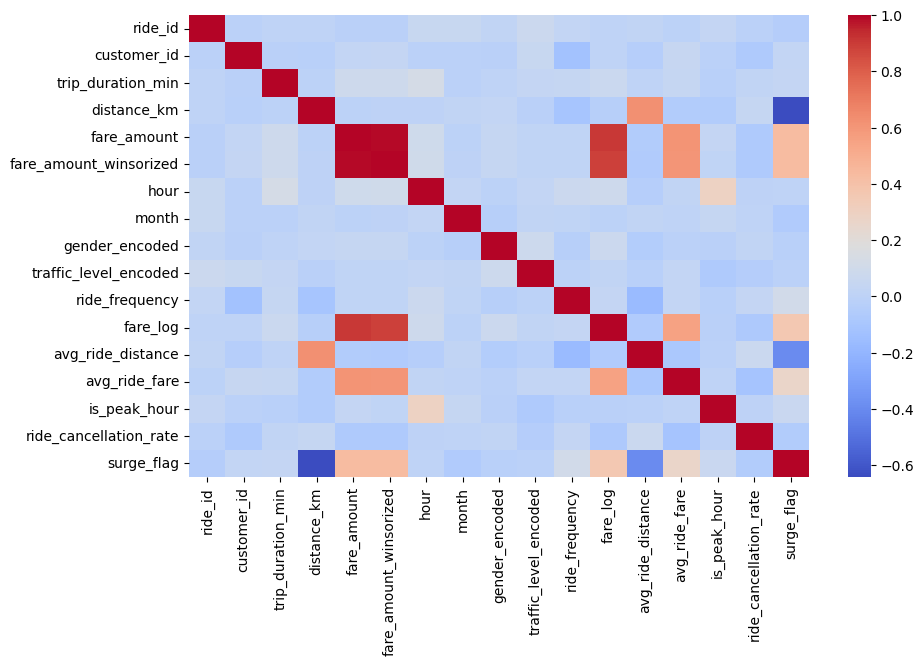

In [54]:

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.show()


* The heatmap shows strong positive correlation between fare-related features and moderate correlation between distance and fare.
* Most demographic and categorical features show weak correlation, indicating pricing is primarily driven by ride distance and dynamic pricing factors.

##  Final Dataset Shape

In [55]:
df.shape

(490, 29)

##  Save Final Prepared Dataset

In [56]:

df.to_csv('fina _prepared rides dataset.csv', index=False)


##  Summary

- Data cleaned and validated
- Outliers handled using Z-score & IQR
- Features encoded, scaled, and engineered
- Dataset ready for ML modeling